<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.upm.es/sfs/Rectorado/Gabinete%20del%20Rector/Logos/UPM/Logotipo%20con%20Leyenda/LOGOTIPO%20leyenda%20color%20PNG.png", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 100px; text-align:right;">November 2023</p>
<p style="margin: 0; text-align:right;">Complex data in health</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Lucía Prieto Santamaría</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

In [37]:
import numpy as np
import pandas as pd

import networkx as nx

import seaborn as sns
import matplotlib.pylab as plt

In [38]:
dga = pd.read_csv("disease_gene.tsv", sep='\t')

In [39]:
dga

,geneId,geneSymbol,DSI,DPI,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,score,EI,YearInitial,YearFinal,NofPmids,NofSnps,source
0,1,A1BG,0.700,0.538,C0019209,Hepatomegaly,phenotype,C23;C06,Finding,0.30,1.000,2017.0,2017.0,1,0,CTD_human
1,1,A1BG,0.700,0.538,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,0.30,1.000,2015.0,2015.0,1,0,CTD_human
2,2,A2M,0.529,0.769,C0002395,Alzheimer's Disease,disease,C10;F03,Disease or Syndrome,0.50,0.769,1998.0,2018.0,3,0,CTD_human
3,2,A2M,0.529,0.769,C0007102,Malignant tumor of colon,disease,C06;C04,Neoplastic Process,0.31,1.000,2004.0,2019.0,1,0,CTD_human
4,2,A2M,0.529,0.769,C0009375,Colonic Neoplasms,group,C06;C04,Neoplastic Process,0.30,1.000,2004.0,2004.0,1,0,CTD_human
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84033,109580095,HBB-LCR,0.743,0.115,C0002875,Cooley's anemia,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84034,109580095,HBB-LCR,0.743,0.115,C0005283,beta Thalassemia,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84035,109580095,HBB-LCR,0.743,0.115,C0019025,Hemoglobin F Disease,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human
84036,109580095,HBB-LCR,0.743,0.115,C0085578,Thalassemia Minor,disease,C16;C15,Disease or Syndrome,0.30,NaN,NaN,NaN,0,0,CTD_human



*   Filter desease types that are not “group” or “phenotype”




In [40]:
cleaned_dga = dga[dga.diseaseType != 'group'][['diseaseName', 'geneSymbol'
                                                  ]].drop_duplicates()


In [41]:
cleaned_dga = cleaned_dga[dga.diseaseType != 'phenotype'][['diseaseName', 'geneSymbol'
                                                  ]].drop_duplicates()

<ipython-input-41-c29a745379fd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_dga = cleaned_dga[dga.diseaseType != 'phenotype'][['diseaseName', 'geneSymbol'


In [42]:
cleaned_dga

,diseaseName,geneSymbol
1,Schizophrenia,A1BG
2,Alzheimer's Disease,A2M
3,Malignant tumor of colon,A2M
5,Presenile dementia,A2M
6,Mental Depression,A2M
...,...,...
84033,Cooley's anemia,HBB-LCR
84034,beta Thalassemia,HBB-LCR
84035,Hemoglobin F Disease,HBB-LCR
84036,Thalassemia Minor,HBB-LCR




*   Lower desease names



In [43]:
cleaned_dga['diseaseName'] = cleaned_dga['diseaseName'].str.lower()

In [44]:
cleaned_dga

,diseaseName,geneSymbol
1,schizophrenia,A1BG
2,alzheimer's disease,A2M
3,malignant tumor of colon,A2M
5,presenile dementia,A2M
6,mental depression,A2M
...,...,...
84033,cooley's anemia,HBB-LCR
84034,beta thalassemia,HBB-LCR
84035,hemoglobin f disease,HBB-LCR
84036,thalassemia minor,HBB-LCR



*   Just keep those diseases that have at least 10 associated genes

In [45]:
num_genes = (cleaned_dga.groupby('diseaseName')
             .agg('count')
             .sort_values(by='geneSymbol')
             .reset_index()
             .rename(columns={'geneSymbol':'count_genes'}))


In [46]:
num_genes

,diseaseName,count_genes
0,11-beta-hydroxylase deficiency,1
1,"mental retardation, autosomal dominant 21",1
2,"mental retardation, autosomal dominant 20",1
3,"mental retardation, autosomal dominant 19",1
4,"mental retardation, autosomal dominant 18",1
...,...,...
9342,malignant neoplasm of prostate,616
9343,colorectal carcinoma,702
9344,"liver cirrhosis, experimental",774
9345,schizophrenia,883


In [47]:
df_filtered = num_genes[num_genes['count_genes'] > 9]

In [48]:
df_filtered

,diseaseName,count_genes
8375,reactive hypoglycemia,10
8376,amyloidosis,10
8377,hoyeraal-hreidarsson syndrome,10
8378,"pseudohypoaldosteronism, type i",10
8379,"hyperpotassemia and hypertension, familial",10
...,...,...
9342,malignant neoplasm of prostate,616
9343,colorectal carcinoma,702
9344,"liver cirrhosis, experimental",774
9345,schizophrenia,883


**3.1 Projected disease
network**

In [49]:
proj_desease_network = nx.from_pandas_edgelist(df_filtered, 'diseaseName', 'count_genes')

In [50]:
proj_desease_network
# it takes a lot of time to draw the network
# nx.draw_networkx(proj_desease_network, with_labels=True)


*   Diameter of the network


In [51]:
# infinite path length because the graph is not connected
# nx.diameter(proj_desease_network)



*   Number of connected components in the network


In [52]:
nx.number_connected_components(proj_desease_network)

134

In [53]:
list(nx.connected_components(proj_desease_network))

[{10,
  '22q11 deletion syndrome',
  'abnormality of nervous system morphology',
  'alopecia areata',
  'amyloidosis',
  'anemia, sickle cell',
  'aortic aneurysm, abdominal',
  'asthma, occupational',
  'asymmetric crying face association',
  'atypical hemolytic uremic syndrome',
  'b-cell malignancy, low-grade',
  'brain stem ischemia, transient',
  'cannabis abuse',
  'carcinomatosis of peritoneal cavity',
  'carotid circulation transient ischemic attack',
  'ceroid lipofuscinosis, neuronal 1, infantile',
  'cranioschisis',
  'crescendo transient ischemic attacks',
  'cryptogenic tonic-clonic epilepsy',
  'cryptorchidism',
  'delirium',
  'epilepsy, myoclonic, infantile',
  'epilepsy, tonic-clonic, familial',
  'epilepsy, tonic-clonic, symptomatic',
  'erectile dysfunction',
  'hashish abuse',
  'head and neck carcinoma',
  'hermanski-pudlak syndrome',
  'hoyeraal-hreidarsson syndrome',
  'hyperpotassemia and hypertension, familial',
  'malignant neoplasm of tongue',
  'mycobacteriu


*   Size of the largest connected component in the network


In [54]:
len(max(nx.connected_components(proj_desease_network), key=len))

84


*   Plot of the degree distribution


In [55]:
degrees = [[n, proj_desease_network.degree(n)] for n in proj_desease_network.nodes()]

degrees_df = pd.DataFrame(degrees, columns=['nodes', 'degree'])

In [56]:
degrees_df.head(30)

,nodes,degree
0,reactive hypoglycemia,1
1,10,52
2,amyloidosis,1
3,hoyeraal-hreidarsson syndrome,1
4,"pseudohypoaldosteronism, type i",1
5,"hyperpotassemia and hypertension, familial",1
6,"epilepsy, tonic-clonic, familial",1
7,"epilepsy, tonic-clonic, symptomatic",1
8,pulmonary arterial hypertension,1
9,"pseudohypoaldosteronism, type ii",1


In [57]:
# group by degree and count how many nodes (deseases) there are per degree, then replace 'nodes' by 'number_nodes'
dd = (degrees_df.groupby('degree')
      .agg('count')
      .reset_index()
      .rename(columns={'nodes':'number_nodes'}))

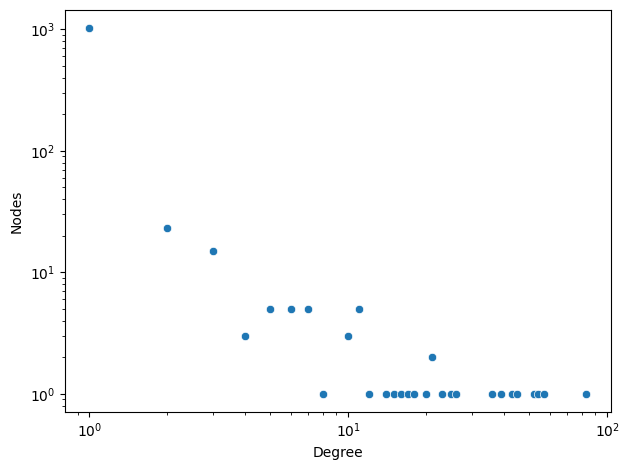

In [58]:
sns.scatterplot(data=dd,
                x='degree',
                y='number_nodes')


plt.xscale('log')
plt.yscale('log')

plt.xlabel('Degree')
plt.ylabel('Nodes')

plt.tight_layout()
plt.show()


*   Identification of some hubs (name the diseases)

I assume, Hubs are nodes with many connections (=high degrees)

In [102]:
# show all nodes (= deseases with a degree larger than a certain threshold)
hubs = degrees_df[degrees_df['degree'] > 50]

In [103]:
pd.set_option('display.max_rows', 100)
hubs

,nodes,degree
1,10,52
54,11,54
109,12,83
193,13,57


In [98]:
# Name the deseases, that have many degrees (the hubs)
substring = '10'

# Filter the DataFrame
nodes_with_substring = degrees_df[degrees_df['nodes'].str.contains(substring, case=False, na=True)]

# Display the results
pd.set_option('display.max_rows', 100)
print(nodes_with_substring)


     nodes  degree
1       10      52
54      11      54
109     12      83
193     13      57
251     14      39
291     15      43
335     16      45
381     17      36
418     18      17
436     19      26
463     20      11
475     21      23
499     22      25
525     23      11
537     24      21
559     25      20
580     26      11
592     27       3
596     28      18
615     29      21
637     30      14
652     31       7
660     32       7
668     33      10
679     34      12
692     35      10
703     36      16
720     37       3
724     38       1
726     39       2
729     40       5
735     41      10
746     42       7
754     43       6
761     44      15
777     45       6
784     46       2
787     47       7
795     48       3
799     50       6
806     52       3
810     53       2
813     54       7
821     55       4
826     57       3
830     58       3
834     59       3
838     60       3
842     61       6
849     62       5
855     63       2
858     65  


*   Plot of the shortest path length distribution

What does it mean?


In [61]:
min(nx.connected_components(proj_desease_network), key=len)

{38, 'malignant neoplasm of brain'}

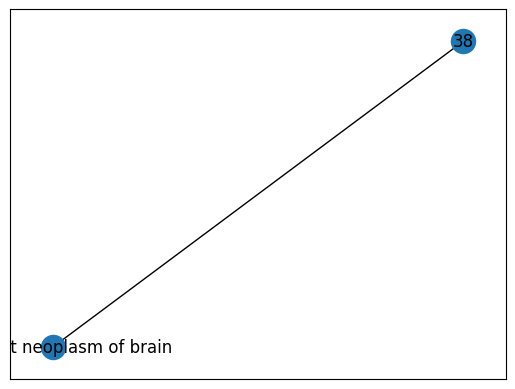

In [62]:
min_path = min(nx.connected_components(proj_desease_network), key=len)
short = proj_desease_network.subgraph(min_path)

nx.draw_networkx(short, with_labels=True)

**3.2. Specific disease in the network: Dermatitis, Atopic**

What is the degree of your disease? Which diseases is your
disease connected to? (Give some examples if there are two many). Plot the
subgraph of your disease and those diseases that is connected to. What is the
average shortest path length of your disease to the other diseases in the
network?

In [63]:
derm = cleaned_dga[cleaned_dga.diseaseName == 'dermatitis, atopic']

In [64]:
derm

,diseaseName,geneSymbol
10361,"dermatitis, atopic",CCR3
10386,"dermatitis, atopic",CCR5
19354,"dermatitis, atopic",FLG
21485,"dermatitis, atopic",GLB1
22163,"dermatitis, atopic",CXCR3
26772,"dermatitis, atopic",IFNG
27466,"dermatitis, atopic",IL1B
27921,"dermatitis, atopic",IL4
27987,"dermatitis, atopic",IL5
28038,"dermatitis, atopic",IL6







*   Degree of dermatitis, atopic



In [65]:
df_Derm = degrees_df[degrees_df['nodes'] == 'dermatitis, atopic']
df_Derm

,nodes,degree
702,"dermatitis, atopic",1




*   Which diseases is your disease connected to?




In [66]:
list(proj_desease_network.neighbors('dermatitis, atopic'))

[36]



*   Plot the subgraph of your disease and those diseases that is connected to




In [67]:
subgraph_nodes = nx.neighbors(proj_desease_network, 'dermatitis, atopic')
subgraph = proj_desease_network.subgraph(['dermatitis, atopic'] + list(subgraph_nodes))

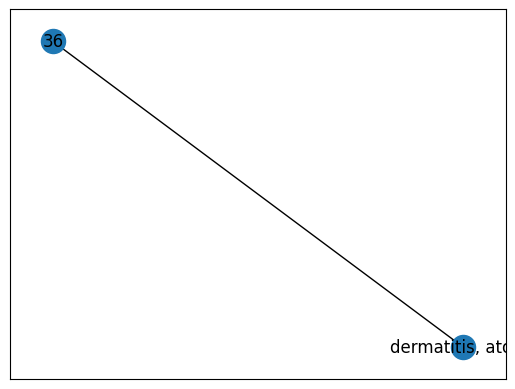

In [68]:
nx.draw_networkx(subgraph, with_labels=True)



*   What is the average shortest path length of your disease to the other diseases in the network?




In [69]:
# our desease